In [1]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio en dolares"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos


La elección de la base de datos que abarca el periodo 2000-01-01 a 2010-01-01 para analizar las acciones de Bancolombia se justifica por la exclusión del impacto de la pandemia mundial, permitiendo un enfoque claro en factores y tendencias previas a este suceso y la limitante de computo. La extensión temporal facilita la evaluación del comportamiento de las acciones, buscando determinar si siguen una caminata aleatoria, lo que es esencial para evaluar la eficacia de estrategias de inversión basadas en análisis histórico. Además, la serie temporal presenta irregularidades en la espaciación de los datos, lo que agrega complejidad al análisis y requiere adaptación en las técnicas utilizadas para tener en cuenta la variabilidad en la frecuencia de observaciones.

In [4]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2003-06-01', end='2013-06-01')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

(2518, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-02,22.080000,22.490000,22.049999,22.200001,16.651115,519800
2003-06-03,22.200001,22.480000,22.200001,22.400000,16.801128,327000
2003-06-04,22.370001,23.139999,22.370001,23.000000,17.251158,444100
2003-06-05,22.900000,23.240000,22.799999,23.150000,17.363668,394200
2003-06-06,25.010000,25.080000,24.100000,24.150000,18.113716,905600


In [5]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
display(df.shape)

df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

,Date,Close
0,2003-06-02,22.200001
1,2003-06-03,22.400000
2,2003-06-04,23.000000
3,2003-06-05,23.150000
4,2003-06-06,24.150000
5,2003-06-09,24.540001
6,2003-06-10,24.660000
7,2003-06-11,25.120001
8,2003-06-12,25.090000
9,2003-06-13,25.170000


(2518, 2)

,Close
Date,
2003-06-02,22.200001
2003-06-03,22.400000
2003-06-04,23.000000
2003-06-05,23.150000
2003-06-06,24.150000
2003-06-07,24.150000
2003-06-08,24.150000
2003-06-09,24.540001
2003-06-10,24.660000


(3652, 1)

In [6]:

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

plot_("Train and Test Data",
      (train_data.index, train_data['Close'], "Train Data"),
      (test_data.index, test_data['Close'], "Test Data"),
      (val_data.index, val_data['Close'], "Validation Data"))

Trial 25 Complete [00h 00m 16s]
val_loss: 0.0014177779667079449

Best val_loss So Far: 0.0013862296473234892
Total elapsed time: 00h 07m 19s
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Best lag (sequence length): 1
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Training - R2: 0.9987, RMSE: 0.0366, MAE: 1.1479
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation - R2: 0.9779, RMSE: 0.0377, MAE: 0.2873
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test - R2: 0.9906, RMSE: 0.0380, MAE: 0.4355


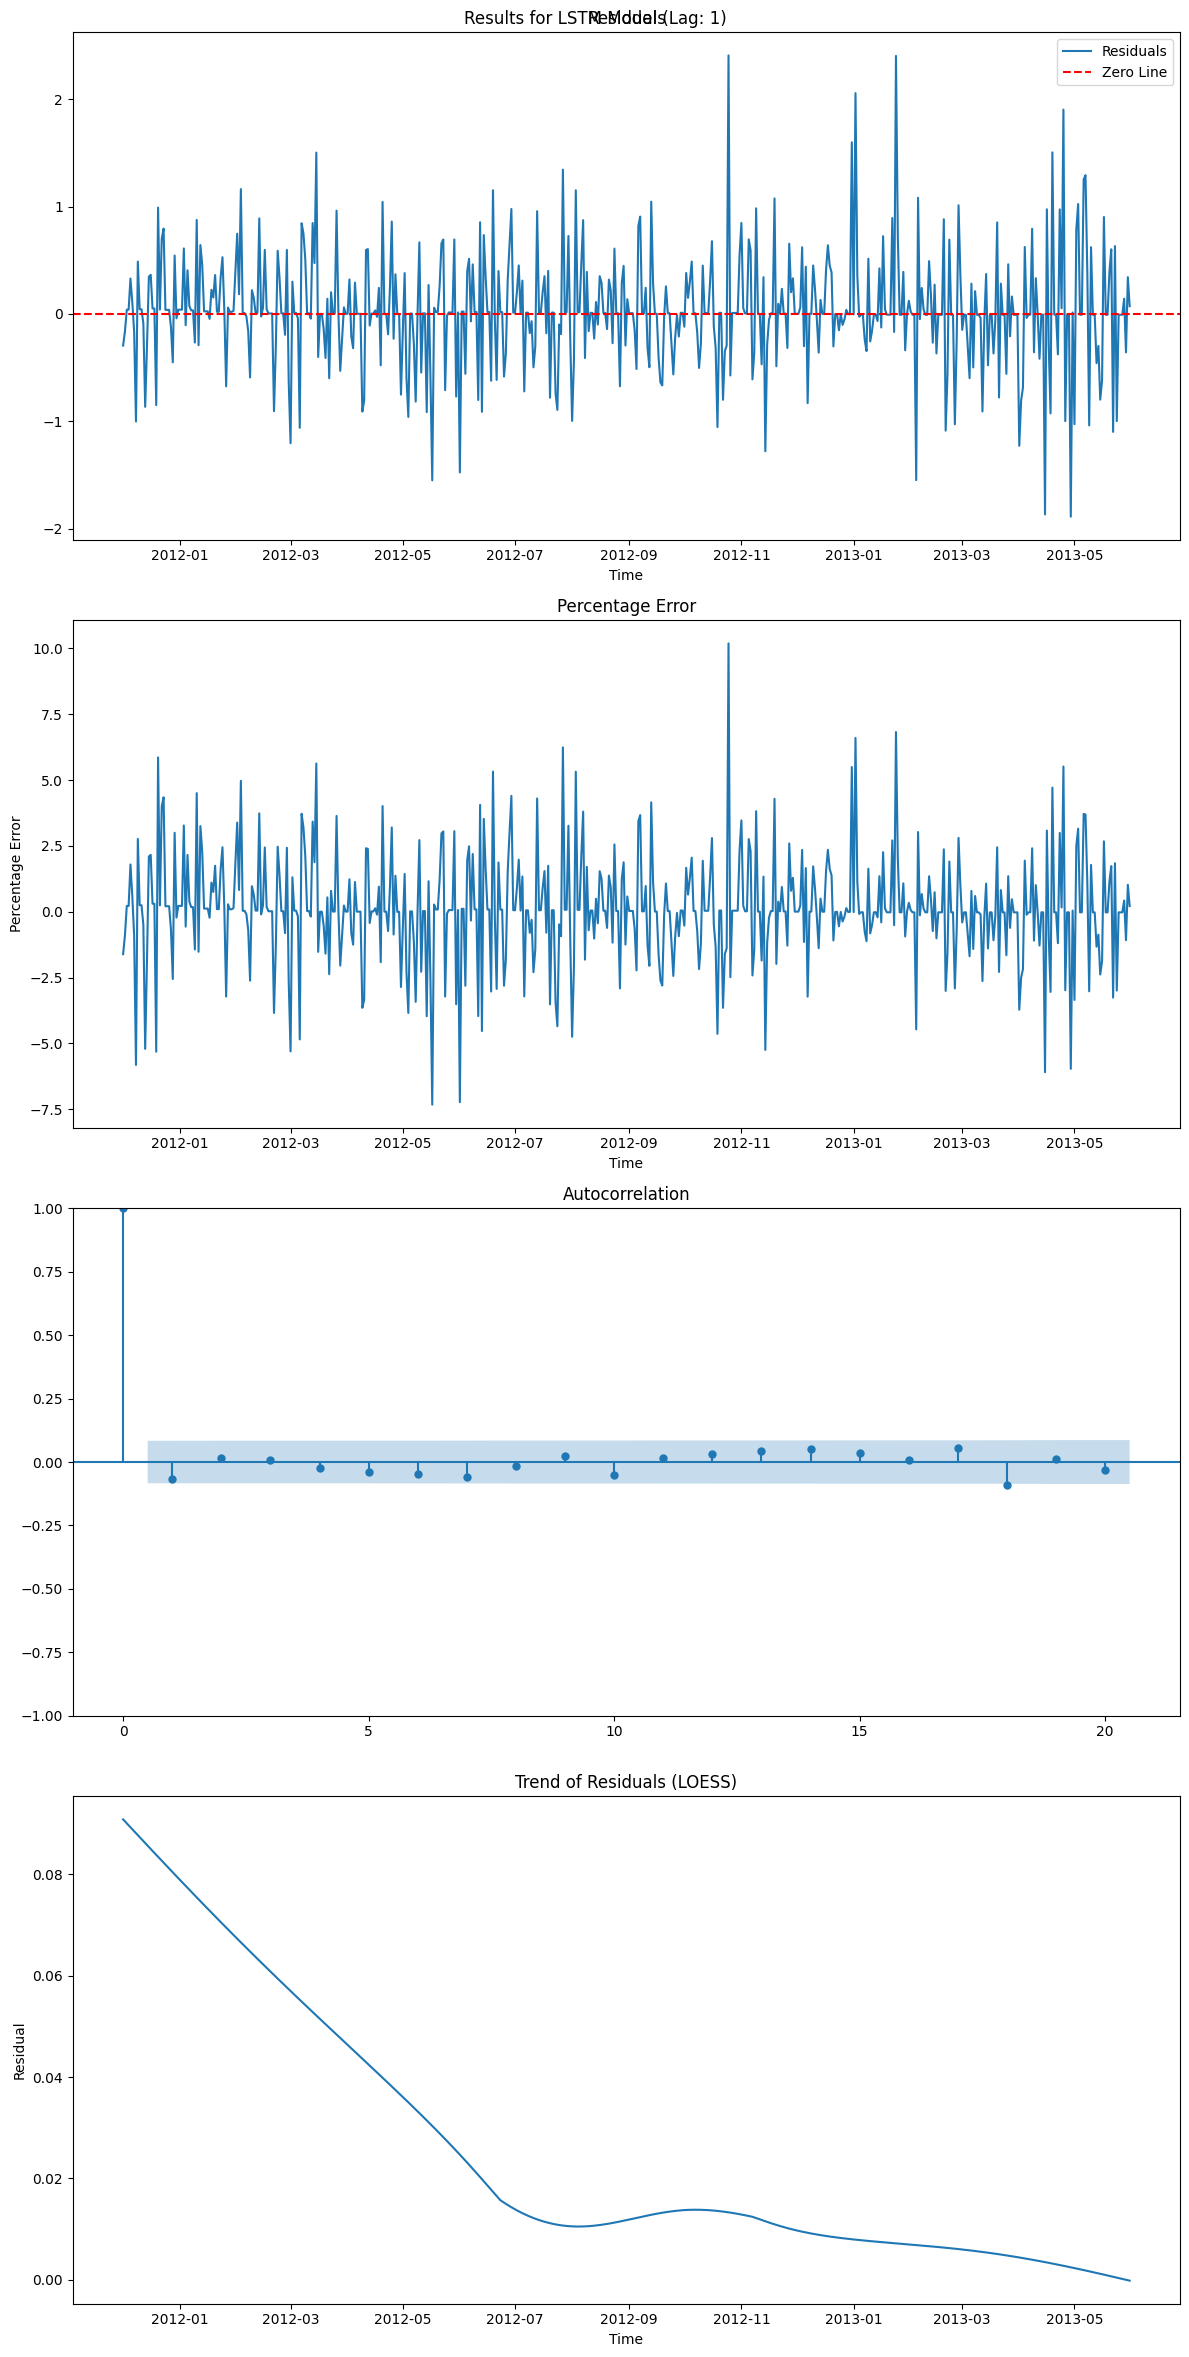

  Model  Lag       MSE  Layers  Neurons_Layer_1 Activation_Layer_1  \
0  LSTM    1  0.273407       2               32               tanh   

   Neurons_Layer_2 Activation_Layer_2  
0               32               tanh  


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import shutil

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def evaluate_model(model, X, y):
    predictions = model.predict(X).flatten()
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2, predictions

def analyze_lstm_results(test_data, y_test, test_pred, best_lag, best_hp):
    # Calculate residuals (changed calculation method)
    test_residual = y_test.flatten() - test_pred.flatten()
    percentage_error = (test_residual / y_test.flatten()) * 100

    # Create figure
    fig, axs = plt.subplots(4, 1, figsize=(12, 24))
    plt.suptitle(f'Results for LSTM Model (Lag: {best_lag})')

    # Residuals
    axs[0].plot(test_data.index[best_lag:], test_residual)
    axs[0].set_title('Residuals')
    axs[0].set_xlabel('Time')
    axs[0].axhline(0, color='red', linestyle='--')
    axs[0].legend(['Residuals', 'Zero Line'])

    # Autocorrelation
    sm.graphics.tsa.plot_acf(test_residual, lags=20, ax=axs[2])
    axs[1].set_title('Autocorrelation')

    # Trend of Residuals (LOESS)
    lowess = sm.nonparametric.lowess(test_residual, np.arange(len(test_residual)), frac=0.75)
    axs[2].plot(test_data.index[best_lag:], lowess[:, 1])
    axs[2].set_title('Trend of Residuals (LOESS)')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

    # Calculate MSE
    mse = mean_squared_error(y_test, test_pred)

    # Create and display DataFrame with results
    mse_results = pd.DataFrame({
        "Model": ["LSTM"],
        "Lag": [best_lag],
        "MSE": [mse],
        "Layers": [best_hp.get('n_layers')],
    })

    for i in range(best_hp.get('n_layers')):
        mse_results[f"Neurons_Layer_{i+1}"] = best_hp.get(f'n_neurons_{i}')
        mse_results[f"Activation_Layer_{i+1}"] = best_hp.get(f'activation_{i}')

    return mse_results, fig

# Assuming df_completo is your original DataFrame with columns 'Date' and 'Close'

# Split the data into training, validation, and test sets
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15
n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo['Close'].iloc[:train_size]
val_data = df_completo['Close'].iloc[train_size:train_size+val_size]
test_data = df_completo['Close'].iloc[train_size+val_size:]

# Clear previous results
tuner_dir = 'my_dir/LSTM_hyperparameters'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

# Normalize the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
val_scaled = scaler.transform(val_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Define the model with adjustable hyperparameters
def build_model(hp):
    lag = hp.Int('lag', min_value=1, max_value=5)
    n_layers = hp.Choice('n_layers', values=[2, 3])

    model = keras.Sequential()
    model.add(layers.Input(shape=(lag, 1)))

    for i in range(n_layers):
        n_neurons = hp.Choice(f'n_neurons_{i}', values=[32, 64, 128])
        activation = hp.Choice(f'activation_{i}', values=['tanh', 'relu'])
        return_sequences = i < n_layers - 1
        model.add(layers.LSTM(units=n_neurons, activation=activation, return_sequences=return_sequences))

    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

# Configure the hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=25,
    executions_per_trial=1,
    directory='my_dir',
    project_name='LSTM_hyperparameters'
)

# Perform the search
best_val_loss = np.inf
best_lag = 0

for lag in range(1, 6):
    X_train, y_train = create_sequences(train_scaled, lag)
    X_val, y_val = create_sequences(val_scaled, lag)

    tuner.search(X_train, y_train, epochs=25, 
                 validation_data=(X_val, y_val), 
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

    # Get the best model and evaluate its validation loss
    best_model = tuner.get_best_models(num_models=1)[0]
    val_mse, _, _ = evaluate_model(best_model, X_val, y_val)
    
    if val_mse < best_val_loss:
        best_val_loss = val_mse
        best_lag = lag

print(f"Best lag (sequence length): {best_lag}")

# Create final sequences with the best lag
X_train, y_train = create_sequences(train_scaled, best_lag)
X_val, y_val = create_sequences(val_scaled, best_lag)
X_test, y_test = create_sequences(test_scaled, best_lag)

# Train the best model
best_model = tuner.get_best_models(num_models=1)[0]
history = best_model.fit(X_train, y_train, epochs=50, 
                         validation_data=(X_val, y_val), 
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=20)],
                         verbose=1)

# Save the best model
best_model.save('best_lstm_model.h5')

# Evaluate the model on the training, validation, and test sets
def evaluate_model_final(model, X, y, set_name):
    predictions = model.predict(X).flatten()
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mae = np.mean(np.abs(y - predictions))
    print(f"{set_name} - R2: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return predictions

train_pred = evaluate_model_final(best_model, X_train, y_train, "Training")
val_pred = evaluate_model_final(best_model, X_val, y_val, "Validation")
test_pred = evaluate_model_final(best_model, X_test, y_test, "Test")

# Denormalize the predictions
train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1)).flatten()
val_pred = scaler.inverse_transform(val_pred.reshape(-1, 1)).flatten()
test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1)).flatten()

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]

# Analyze and visualize results
mse_results, fig = analyze_lstm_results(test_data, scaler.inverse_transform(y_test), test_pred, best_lag, best_hp)
display(mse_results)

In [10]:
date = test_data.index + pd.DateOffset(days=best_lag)

plot_("Predicciones de la Serie Temporal",
      (date, test_data.values, "Real"),
      (date, test_pred, "Predicción"))

In [21]:
mse_results

,Model,Lag,MSE,Layers,Neurons_Layer_1,Activation_Layer_1,Neurons_Layer_2,Activation_Layer_2
0,LSTM,1,0.273407,2,32,tanh,32,tanh
